# Plane segmentation

Open3D also supports segmententation of geometric primitives from point clouds using RANSAC. To find the plane with the largest support in the point cloud, we can use segment_plane. The method has three arguments: distance_threshold defines the maximum distance a point can have to an estimated plane to be considered an inlier, ransac_n defines the number of points that are randomly sampled to estimate a plane, and num_iterations defines how often a random plane is sampled and verified. The function then returns the plane as (𝑎,𝑏,𝑐,𝑑) such that for each point (𝑥,𝑦,𝑧) on the plane we have 𝑎𝑥+𝑏𝑦+𝑐𝑧+𝑑=0. The function further returns a list of indices of the inlier points.

In [1]:
import open3d as o3d 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import sys
# only needed for tutorial, monkey patches visualization
sys.path.append (' ..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

Plane equation: 0.02x + 1.00y + -0.01z + -3.34 = 0


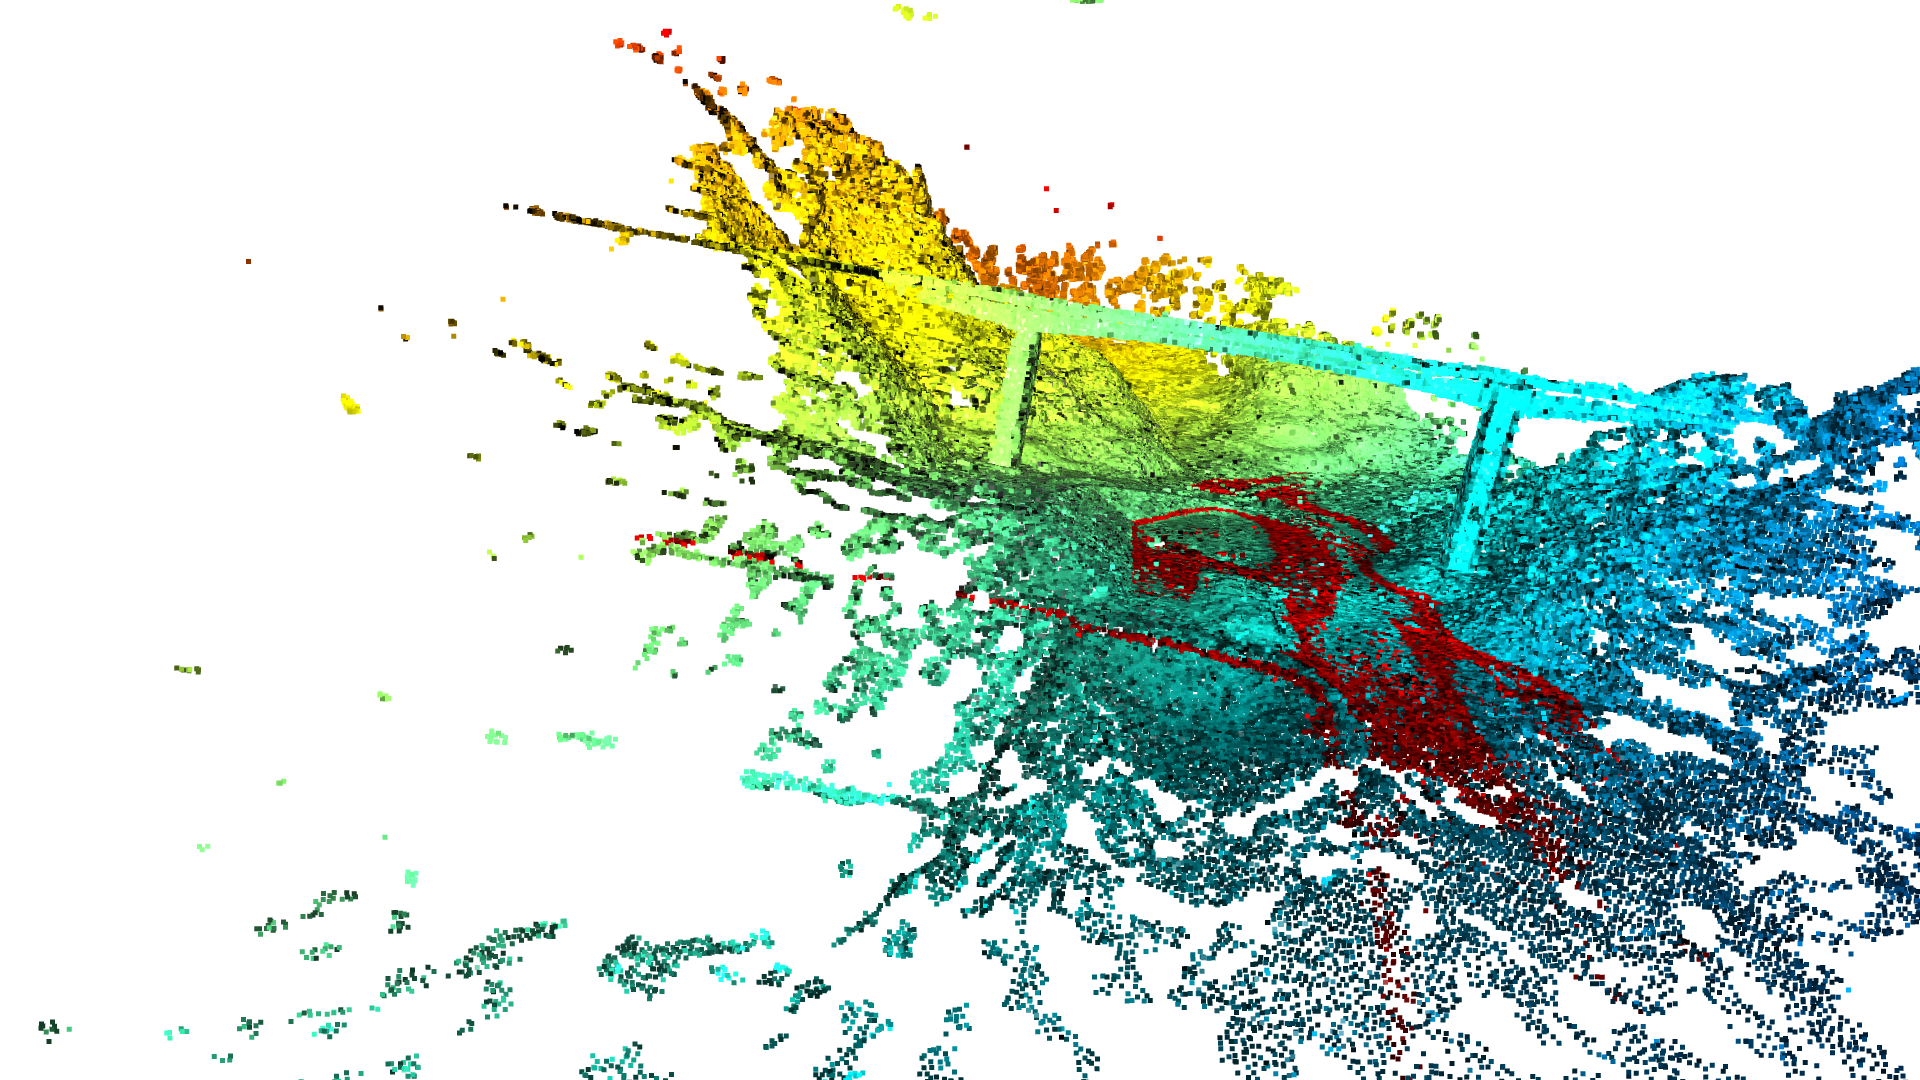

In [4]:
pcd = o3d.io.read_point_cloud("./filtered_point_cloud.ply")
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01,
                                         ransac_n=3,
                                         num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                  zoom=0.8,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])